In [15]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import yfinance as yf

In [16]:
apple = yf.Ticker("AAPL")
apple_data = apple.history(period="1y")

In [17]:
apple_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-05-30 00:00:00-04:00,176.025173,178.044447,175.637233,176.363373,55964400,0.0,0.0
2023-05-31 00:00:00-04:00,176.393224,178.402557,175.826227,176.313644,99625300,0.0,0.0
2023-06-01 00:00:00-04:00,176.761268,179.168482,175.995331,179.138641,68901800,0.0,0.0
2023-06-02 00:00:00-04:00,180.073674,180.819712,178.313020,179.994095,61945900,0.0,0.0
2023-06-05 00:00:00-04:00,181.665223,183.972959,177.099459,178.631332,121946500,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-21 00:00:00-04:00,191.089996,192.729996,190.919998,192.350006,42309400,0.0,0.0
2024-05-22 00:00:00-04:00,192.270004,192.820007,190.270004,190.899994,34648500,0.0,0.0
2024-05-23 00:00:00-04:00,190.979996,191.000000,186.630005,186.880005,51005900,0.0,0.0


In [19]:
apple_data.index

DatetimeIndex(['2023-05-30 00:00:00-04:00', '2023-05-31 00:00:00-04:00',
               '2023-06-01 00:00:00-04:00', '2023-06-02 00:00:00-04:00',
               '2023-06-05 00:00:00-04:00', '2023-06-06 00:00:00-04:00',
               '2023-06-07 00:00:00-04:00', '2023-06-08 00:00:00-04:00',
               '2023-06-09 00:00:00-04:00', '2023-06-12 00:00:00-04:00',
               ...
               '2024-05-14 00:00:00-04:00', '2024-05-15 00:00:00-04:00',
               '2024-05-16 00:00:00-04:00', '2024-05-17 00:00:00-04:00',
               '2024-05-20 00:00:00-04:00', '2024-05-21 00:00:00-04:00',
               '2024-05-22 00:00:00-04:00', '2024-05-23 00:00:00-04:00',
               '2024-05-24 00:00:00-04:00', '2024-05-28 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=251, freq=None)

<Axes: xlabel='Date'>

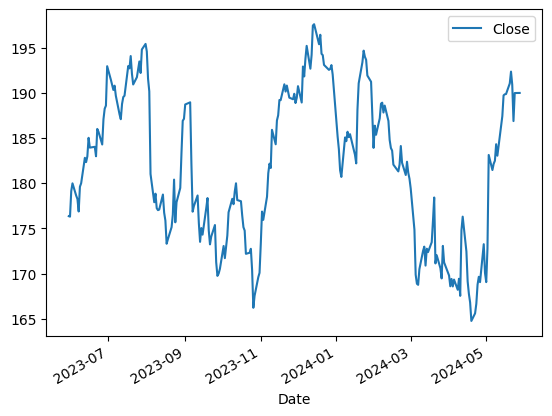

In [20]:
apple_data.plot.line(y='Close', use_index=True)

In [24]:
# del apple_data["Dividends"]
# del apple_data["Stock Splits"]

del apple_data["Open"]
del apple_data["High"]
del apple_data["Low"]
del apple_data["Volume"]
apple_data

,Close
Date,
2023-05-30 00:00:00-04:00,176.363373
2023-05-31 00:00:00-04:00,176.313644
2023-06-01 00:00:00-04:00,179.138641
2023-06-02 00:00:00-04:00,179.994095
2023-06-05 00:00:00-04:00,178.631332
...,...
2024-05-21 00:00:00-04:00,192.350006
2024-05-22 00:00:00-04:00,190.899994
2024-05-23 00:00:00-04:00,186.880005


In [34]:
del apple_data["Missing"]
apple_data["Missing"] = apple_data.Close
apple_data["Missing"].iloc[200:205] = np.nan
apple_data

,Close,Missing
Date,,
2023-05-30 00:00:00-04:00,176.363373,176.363373
2023-05-31 00:00:00-04:00,176.313644,176.313644
2023-06-01 00:00:00-04:00,179.138641,179.138641
2023-06-02 00:00:00-04:00,179.994095,179.994095
2023-06-05 00:00:00-04:00,178.631332,178.631332
...,...,...
2024-05-21 00:00:00-04:00,192.350006,192.350006
2024-05-22 00:00:00-04:00,190.899994,190.899994
2024-05-23 00:00:00-04:00,186.880005,186.880005


<Axes: xlabel='Date'>

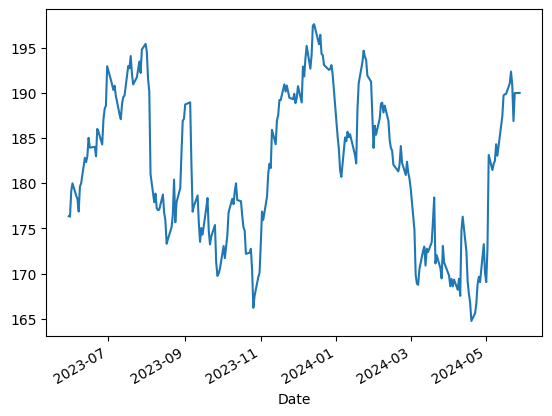

In [32]:
apple_data.Close.plot()

<Axes: xlabel='Date'>

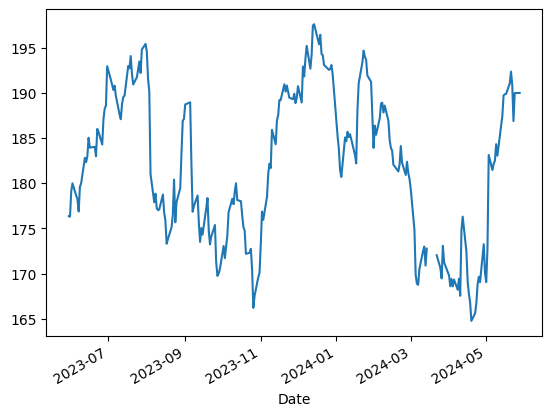

In [35]:
apple_data.Missing.plot()

In [36]:
# Define the state space model (local level model)
ssmodel = sm.tsa.UnobservedComponents(apple_data['Missing'], level='local level')

# Fit the model
result = ssmodel.fit()

# Get the smoothed state estimates
smoothed_state = result.smoothed_state[0]

# Store results
apple_data['Imputed_Price'] = smoothed_state

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.03182D+00    |proj g|=  9.14660D-02

At iterate    5    f=  2.18711D+00    |proj g|=  2.97879D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6     13      1     0     0   1.341D-07   2.187D+00
  F =   2.1871080171852659     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


In [37]:
apple_data

,Close,Missing,Imputed_Price
Date,,,
2023-05-30 00:00:00-04:00,176.363373,176.363373,176.363373
2023-05-31 00:00:00-04:00,176.313644,176.313644,176.313644
2023-06-01 00:00:00-04:00,179.138641,179.138641,179.138641
2023-06-02 00:00:00-04:00,179.994095,179.994095,179.994095
2023-06-05 00:00:00-04:00,178.631332,178.631332,178.631332
...,...,...,...
2024-05-21 00:00:00-04:00,192.350006,192.350006,192.350006
2024-05-22 00:00:00-04:00,190.899994,190.899994,190.899994
2024-05-23 00:00:00-04:00,186.880005,186.880005,186.880005


<Axes: xlabel='Date'>

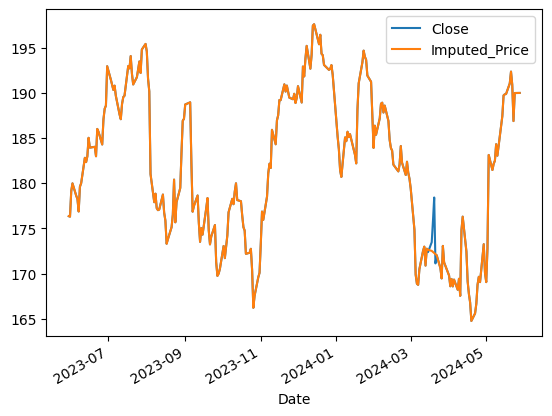

In [41]:
apple_data[["Close", "Imputed_Price"]].plot()

In [2]:

# Generate a date range
dates = pd.date_range('2020-01-01', periods=100, freq='B')

# Generate example stock price data with a linear trend and some noise
np.random.seed(0)
prices = np.linspace(100, 200, len(dates)) + np.random.normal(0, 5, len(dates))

# Introduce missing values
prices[10:15] = np.nan
prices[30:35] = np.nan
prices[70:75] = np.nan

# Create a DataFrame
data = pd.DataFrame({'Date': dates, 'Price': prices})
data.set_index('Date', inplace=True)


<Axes: xlabel='Date'>

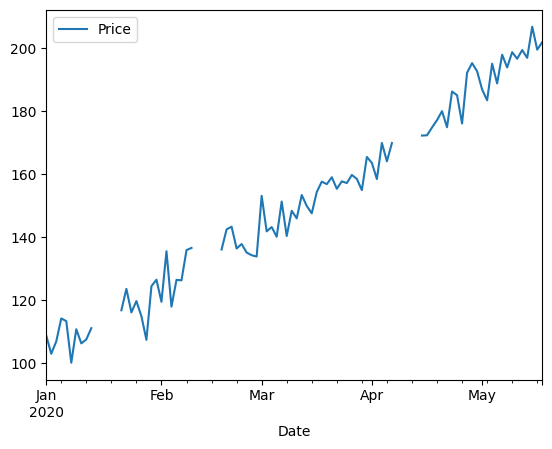

In [4]:
data.plot()

In [8]:
# Define the state space model (local level model)
mod = sm.tsa.UnobservedComponents(data['Price'], level='local level')

# Fit the model
res = mod.fit()

# Get the smoothed state estimates
smoothed_state = res.smoothed_state[0]

# Create a DataFrame to store the results
imputed_data = data.copy()
imputed_data['Imputed_Price'] = smoothed_state


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.67074D+00    |proj g|=  2.61195D-02
  ys=-2.852E+00  -gs= 8.748E-01 BFGS update SKIPPED

At iterate    5    f=  2.70994D+00    |proj g|=  3.91505D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     16      2     1     0   1.399D-06   2.710D+00
  F =   2.7097523484306318     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


In [14]:
list(imputed_data.Imputed_Price)

[107.52452970339428,
 107.0185992316721,
 108.08003081797003,
 109.59752355551672,
 109.30145227482244,
 107.41102241747609,
 108.35475983416794,
 108.33787609485839,
 109.11253382228787,
 110.49252302876133,
 111.61776688099773,
 112.74301073323412,
 113.86825458547051,
 114.9934984377069,
 116.1187422899433,
 117.2439861421797,
 118.53508951879165,
 117.8328555970401,
 117.79035709463669,
 116.9825807220963,
 116.98088843011821,
 120.71165407553832,
 122.96858680312317,
 123.82706606862253,
 126.36939475296961,
 125.30520109532534,
 127.10552202524826,
 129.14601040602184,
 132.28513986469855,
 133.99227312595693,
 134.6640244734891,
 135.33577582102126,
 136.00752716855342,
 136.67927851608562,
 137.35102986361778,
 138.02278121114995,
 139.43270868963916,
 139.63715859569555,
 138.375629418562,
 137.8682812384727,
 137.3554013737317,
 137.70061444765798,
 139.37026642224697,
 143.18204569812866,
 143.08054530553338,
 143.44223279115224,
 143.87355668395367,
 145.7412970407282,
 145

In [6]:
imputed_data

,Price,Imputed_Price
Date,,
2020-01-01,108.820262,107.524530
2020-01-02,103.010887,107.018599
2020-01-03,106.913892,108.080031
2020-01-06,114.234769,109.597524
2020-01-07,113.378194,109.301452
...,...,...
2020-05-13,199.492462,198.775762
2020-05-14,197.022197,199.595068
2020-05-15,206.909150,201.420589


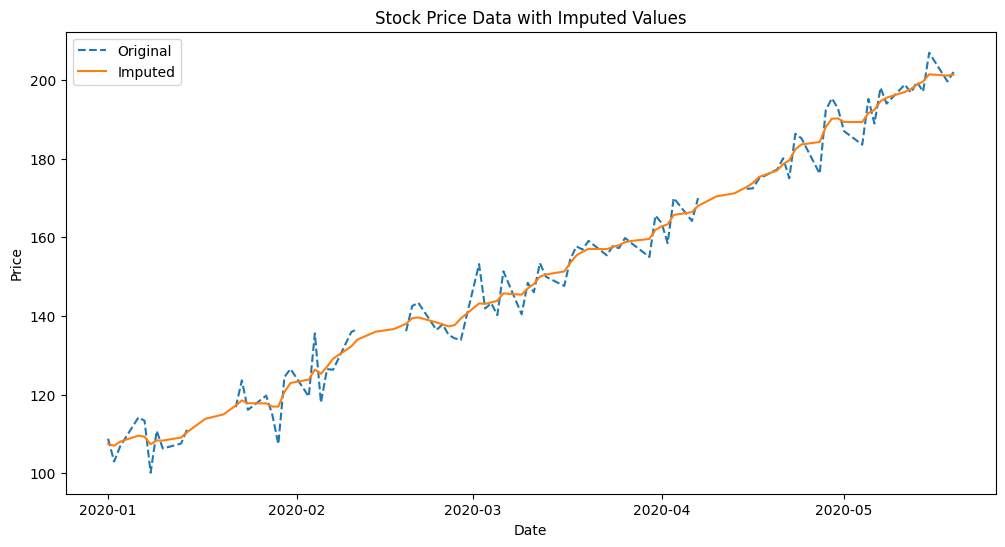

In [7]:

# Plot the original and imputed data
plt.figure(figsize=(12, 6))
plt.plot(data['Price'], label='Original', linestyle='--')
plt.plot(imputed_data['Imputed_Price'], label='Imputed', linestyle='-')
plt.legend()
plt.title('Stock Price Data with Imputed Values')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
